In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
import shap
import os
from datetime import datetime
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.metrics import precision_recall_fscore_support
from xgboost import XGBClassifier
import xgboost as xgb
import joblib
from sklearn.metrics import fbeta_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from tensorflow.keras.optimizers import Adam, RMSprop

In [2]:
def standard_scaler_np(arr):
    mean_val = np.mean(arr)
    std_val = np.std(arr)
    scaled_arr = (arr - mean_val) / std_val
    return scaled_arr

In [4]:
data_A  = pd.read_csv("F:/New_Drugs/Li_Endo/Li_Endo_Training.csv")  # Ganti dengan lokasi dataset A
data_A1 = data_A.drop(columns=['Sample_ID', 'Drug_Name', 'risk_level', 'Vm_Peak', 'Ca_Peak', 'Vm_Resting', 'Ca_Diastole', 'qInward', 'CaD90', 'qNet', 'CaD50'])
print(data_A1)

       dVm/dt_repol  Max_dVm/dt       APD90       APD50  APDtri  Catri  \
0         -0.300345  250.237212  391.600435  318.450435  73.150  412.0   
1         -0.317049  252.406287  370.700439  303.150439  67.550  404.5   
2         -0.279408  252.691407  420.275299  340.875299  79.400  424.5   
3         -0.255510  251.527446  455.900506  365.575506  90.325  439.0   
4         -0.298442  252.932589  394.375319  321.325319  73.050  413.0   
...             ...         ...         ...         ...     ...    ...   
21995     -0.298215  250.843263  350.900470  281.325470  69.575  439.5   
21996     -0.283611  250.457216  371.725455  297.850455  73.875  433.5   
21997     -0.290358  250.842534  366.000421  293.750421  72.250  431.5   
21998     -0.281967  250.401090  374.300405  300.075404  74.225  432.0   
21999     -0.280863  250.389663  376.475531  301.800531  74.675  432.0   

       risk_code  
0              0  
1              0  
2              0  
3              0  
4              0

In [5]:
X_data_bfr = data_A1.drop(['risk_code'], axis=1)
y_data_label = data_A1['risk_code']
print(X_data_bfr)
print(y_data_label)

       dVm/dt_repol  Max_dVm/dt       APD90       APD50  APDtri  Catri
0         -0.300345  250.237212  391.600435  318.450435  73.150  412.0
1         -0.317049  252.406287  370.700439  303.150439  67.550  404.5
2         -0.279408  252.691407  420.275299  340.875299  79.400  424.5
3         -0.255510  251.527446  455.900506  365.575506  90.325  439.0
4         -0.298442  252.932589  394.375319  321.325319  73.050  413.0
...             ...         ...         ...         ...     ...    ...
21995     -0.298215  250.843263  350.900470  281.325470  69.575  439.5
21996     -0.283611  250.457216  371.725455  297.850455  73.875  433.5
21997     -0.290358  250.842534  366.000421  293.750421  72.250  431.5
21998     -0.281967  250.401090  374.300405  300.075404  74.225  432.0
21999     -0.280863  250.389663  376.475531  301.800531  74.675  432.0

[22000 rows x 6 columns]
0        0
1        0
2        0
3        0
4        0
        ..
21995    2
21996    2
21997    2
21998    2
21999    2
N

In [6]:
label_encoder = LabelEncoder()
y_data = label_encoder.fit_transform(y_data_label)

In [7]:
X_data = standard_scaler_np(X_data_bfr)
# X_data=X_data_bfr
print(X_data)

       dVm/dt_repol  Max_dVm/dt     APD90     APD50    APDtri     Catri
0         -0.535007   -0.090278 -0.293807 -0.250641 -0.407125 -0.758599
1         -1.011130    1.276417 -0.619938 -0.567263 -0.746554 -1.044940
2          0.061780    1.456066  0.153645  0.213423 -0.028299 -0.281363
3          0.742968    0.722675  0.709553  0.724574  0.633890  0.272230
4         -0.480771    1.608030 -0.250507 -0.191148 -0.413187 -0.720420
...             ...         ...       ...       ...       ...       ...
21995     -0.474294    0.291584 -0.928904 -1.018913 -0.623814  0.291319
21996     -0.058008    0.048342 -0.603943 -0.676941 -0.363182  0.062246
21997     -0.250324    0.291124 -0.693279 -0.761788 -0.461676 -0.014111
21998     -0.011147    0.012979 -0.563763 -0.630898 -0.341967  0.004978
21999      0.020321    0.005779 -0.529821 -0.595198 -0.314692  0.004978

[22000 rows x 6 columns]


In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'


In [8]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Layer
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.centers = self.add_weight(name='centers',
                                       shape=(self.units, input_shape[1]),
                                       initializer=RandomUniform(minval=-1, maxval=1),
                                       trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        C = K.expand_dims(self.centers)
        H = K.transpose(C - K.transpose(inputs))
        return K.exp(-self.gamma * K.sum(H ** 2, axis=1))

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

    def get_config(self):
        config = super(RBFLayer, self).get_config()
        config.update({'units': self.units, 'gamma': self.gamma})
        return config

# Define the RBF network creation function
def create_rbf_model(input_shape, units_rbf, gamma):
    model = Sequential()
    model.add(RBFLayer(units_rbf, gamma, input_shape=(input_shape,)))
    model.add(Dense(3, activation='softmax'))  # Assuming 3 classes
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [9]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

input_shape = X_data.shape[1]

# Function to create model, required for KerasClassifier
def create_model(units_rbf=10, gamma=1.0):
    return create_rbf_model(input_shape=input_shape, units_rbf=units_rbf, gamma=gamma)

# Wrap Keras model and use it in scikit-learn
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0)

# Define the grid search parameters
param_grid = {
    'units_rbf': [5, 10, 15],
    'gamma': [0.1, 0.5, 1.0],
}

# Perform the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)  # cv is 3 for grid search, but we'll do 5-fold later
grid_result = grid.fit(X_data, y_data)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

best_params = grid_result.best_params_
best_units_rbf = best_params['units_rbf']
best_gamma = best_params['gamma']

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


Best: 0.459947 using {'gamma': 0.5, 'units_rbf': 10}


In [10]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import to_categorical

# Setup for stratified cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Assuming you have already defined X_data and y_data
X_data_np = X_data.to_numpy() if isinstance(X_data, pd.DataFrame) else X_data  # Convert to numpy array if X_data is a DataFrame
y_data_np = y_data if isinstance(y_data, np.ndarray) else y_data.to_numpy()  # Ensure y_data is a numpy array

current_time = datetime.now().strftime("%Y%m%d-%H%M%S")
model_dir = f"F:/New_Drugs/Li_Endo/RBF6f_units_rbf-{best_units_rbf}_gamma-{best_gamma}_{current_time}/"
os.makedirs(model_dir, exist_ok=True)

# Continue with the StratifiedKFold setup
fold_var = 1
for train_index, test_index in skf.split(X_data_np, y_data_np):
    
    # Create the model with the best found parameters
    model = create_rbf_model(X_data_np.shape[1], units_rbf=best_units_rbf, gamma=best_gamma)  # Example hyperparameters

    # One-hot encode the outputs
    y_train_encoded = to_categorical(y_data_np[train_index], num_classes=3)
    y_test_encoded = to_categorical(y_data_np[test_index], num_classes=3)

    # Define your checkpoint path including the fold_var
    checkpoint_path = f"{model_dir}/model_fold_{fold_var}_{{epoch:02d}}_{{val_accuracy:.2f}}.hdf5"
    checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
    csv_logger = CSVLogger(f"{model_dir}/training_log_fold_{fold_var}.csv", append=True)

    # Train the model
    model.fit(X_data_np[train_index], y_train_encoded, validation_data=(X_data_np[test_index], y_test_encoded), epochs=1000, batch_size=32, callbacks=[checkpoint, csv_logger])

    fold_var += 1


Epoch 1/1000
432/550 [======================>.......] - ETA: 0s - loss: 1.0206 - accuracy: 0.6019
Epoch 00001: val_accuracy improved from -inf to 0.67114, saving model to F:/New_Drugs/Li_Endo/RBF6f_units_rbf-10_gamma-0.5_20240317-175146\model_fold_1_01_0.67.hdf5
550/550 [==============================] - 0s 604us/step - loss: 1.0044 - accuracy: 0.6135 - val_loss: 0.9158 - val_accuracy: 0.6711
Epoch 2/1000
422/550 [======================>.......] - ETA: 0s - loss: 0.8738 - accuracy: 0.6315
Epoch 00002: val_accuracy did not improve from 0.67114
550/550 [==============================] - 0s 467us/step - loss: 0.8639 - accuracy: 0.6359 - val_loss: 0.8132 - val_accuracy: 0.6661
Epoch 3/1000
426/550 [======================>.......] - ETA: 0s - loss: 0.7920 - accuracy: 0.6764
Epoch 00003: val_accuracy improved from 0.67114 to 0.71455, saving model to F:/New_Drugs/Li_Endo/RBF6f_units_rbf-10_gamma-0.5_20240317-175146\model_fold_1_03_0.71.hdf5
550/550 [==============================] - 0s 475us/

In [11]:
data_testA  = pd.read_csv("F:/New_Drugs/Li_Endo/Li_Endo_Testing.csv")  # Ganti dengan lokasi dataset A
data_testA1 = data_testA.drop(columns=['Sample_ID', 'Drug_Name', 'risk_level', 'Vm_Peak', 'Ca_Peak', 'Vm_Resting', 'Ca_Diastole', 'qInward', 'CaD90', 'qNet', 'CaD50'])
print(data_testA1)

       dVm/dt_repol  Max_dVm/dt       APD90       APD50   APDtri  Catri  \
0         -0.329834  250.475067  348.200591  287.100592   61.100  396.0   
1         -0.329827  250.681082  348.200478  287.100478   61.100  396.0   
2         -0.329884  250.181444  348.200607  287.100607   61.100  396.0   
3         -0.329867  250.462035  348.200344  287.100344   61.100  396.0   
4         -0.329853  250.591458  348.200364  287.100364   61.100  396.0   
...             ...         ...         ...         ...      ...    ...   
31980     -0.192852  247.793762  574.150367  443.650367  130.500  481.0   
31981     -0.200770  248.506876  555.200410  431.600410  123.600  475.0   
31982     -0.211534  248.518006  526.400475  412.700475  113.700  454.0   
31983     -0.190929  250.188522  586.175406  451.700406  134.475  496.5   
31984     -0.195254  247.910467  570.425342  441.500342  128.925  487.0   

       risk_code  
0              1  
1              1  
2              1  
3              1  
4   

In [12]:
X_data_test_bfr = data_testA1.drop(['risk_code'], axis=1)
y_data_test_lbl = data_testA1['risk_code']

In [13]:
label_encoder = LabelEncoder()
y_data_test = label_encoder.fit_transform(y_data_test_lbl)

In [14]:
X_data_test = standard_scaler_np(X_data_test_bfr)
# X_data_test = X_data_test_bfr
X_data_test

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'


,dVm/dt_repol,Max_dVm/dt,APD90,APD50,APDtri,Catri
0,-0.309415,0.301915,-0.360708,-0.321789,0.106496,-0.343023
1,-0.309394,0.311516,-0.360709,-0.321790,0.106496,-0.343023
2,-0.309578,0.288232,-0.360708,-0.321789,0.106496,-0.343023
3,-0.309525,0.301308,-0.360710,-0.321790,0.106496,-0.343023
4,-0.309477,0.307340,-0.360709,-0.321790,0.106496,-0.343023
...,...,...,...,...,...,...
31980,0.133906,0.176960,0.959226,0.371449,0.783260,0.247752
31981,0.108281,0.210193,0.848526,0.318089,0.715973,0.206050
31982,0.073446,0.210712,0.680285,0.234396,0.619432,0.060094
31983,0.140131,0.288562,1.029473,0.407096,0.822022,0.355482


In [15]:
import os
import glob
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

# Tentukan direktori tempat model-model Anda disimpan

# List semua file model yang ada di direktori
model_files = glob.glob(os.path.join(model_dir, '*.hdf5'))

# Inisialisasi list untuk menyimpan hasil pengujian
results = []

# Modify the loading process to include custom_objects
for model_file in model_files:
    model = load_model(model_file, custom_objects={'RBFLayer': RBFLayer})

    # Proceed with your code for prediction and evaluation
    y_pred = model.predict(X_data_test)
    accuracy = accuracy_score(y_true=y_data_test, y_pred=np.argmax(y_pred, axis=1))
    f1 = f1_score(y_true=y_data_test, y_pred=np.argmax(y_pred, axis=1), average='weighted')
    
    # Store and process your results as needed
    result = {
        'Model': os.path.basename(model_file),
        'Accuracy': accuracy,
        'F1 Score': f1,
    }
    results.append(result)

# Continue with your result processing
results_df = pd.DataFrame(results)
results_df.to_csv(model_dir+'Hasil_one_test_ORd_01.csv', index=False)

In [16]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from keras.models import load_model
from sklearn.metrics import precision_recall_fscore_support
from xgboost import XGBClassifier
import xgboost as xgb
import joblib
from sklearn.metrics import fbeta_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model_test = load_model(model_dir + "model_fold_2_129_0.87.hdf5", custom_objects={'RBFLayer': RBFLayer})

In [ ]:
columns_to_drop = ['risk_level', 'risk_code', 'Sample_ID']
encoded_df_column_list = X_data_test.columns.difference(columns_to_drop)

In [ ]:
explainer = shap.KernelExplainer(model_test.predict, X_data.values[:1000])  # Using the first 100 examples as background
shap_values = explainer.shap_values(X_data.values[:1000])

In [ ]:
shap.summary_plot(shap_values, plot_type="bar", class_names= ['High-risk', 'Intermediate-risk', 'Low-risk'], feature_names = X_data_test.columns, show=False)
plt.ylabel("Features")
plt.xlabel("Mean (|SHAP Value|)")
# plt.savefig("F:/7. Result/running_bu_yunen/ord/ANN_14_Feature2-node1_12-node2_11-oprimizer_adam/ANN_Sum_Feature_Importance.jpg")
# plt.savefig("my_dependence_plot.pdf") # we can save a PDF of the figure if we want
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Assuming 'shap_values' is a list of arrays, where each array corresponds to a class
# and 'X_data_test_bfr.columns' gives you the feature names.

# Colors and class names for each class
class_colors = ['#EC2CAC', '#077CDB', '#7E8511']
class_names = ['High-risk', 'Intermediate-risk', 'Low-risk']

# Output directory for saving TIFF files
output_directory = 'E:/backup_CML_1/New_Drugs/Li_Endo/Result_Revision_1/12f_knn_metric_euclidean_n_neighbors_3/'  # Change to your specific directory

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Prepare data for the stacked bar plot
feature_names = X_data_test.columns
num_features = len(feature_names)
num_classes = len(shap_values)
mean_abs_shap_values = np.abs(shap_values).mean(axis=1)  # Mean across samples for each class

# Accumulate total SHAP values for each feature
total_shap_values = np.sum(mean_abs_shap_values, axis=0)

# Sort features by total SHAP values from highest to lowest
sorted_indices = np.argsort(total_shap_values)  # The minus sign is for descending order
sorted_feature_names = feature_names[sorted_indices]
sorted_total_shap_values = total_shap_values[sorted_indices]

# Create the sorted stacked bar plot
plt.figure(figsize=(10, 6))
bars_data = np.zeros(num_features)  # Initialize the bottom of the bars

for class_index in range(num_classes):
    # Sort the mean values according to the sorted feature indices
    sorted_mean_vals = mean_abs_shap_values[class_index][sorted_indices]
    
    # Plot sorted stacked bars
    plt.barh(sorted_feature_names, sorted_mean_vals, left=bars_data, color=class_colors[class_index],
             edgecolor='black', height=0.5, label=class_names[class_index])
    bars_data += sorted_mean_vals  # Update the bottom for the next stack

# Add text with the total SHAP value outside of each stacked bar
for i, total_val in enumerate(sorted_total_shap_values):
    plt.text(bars_data[i], i, f'{total_val:.2f}', ha='left', va='center', color='black', fontsize=8)

# Customize the plot
plt.xlabel('Mean (|SHAP Value|)')
plt.ylabel('Features')
plt.title('Summary of SHAP Values by Class')
plt.grid(axis='x')
plt.legend(loc='lower right')

# Save the plot as a TIFF file with DPI 300
output_file_path = os.path.join(model_dir, 'SHAP_Summary_Stacked_Plot2.tif')
plt.savefig(output_file_path, format='tiff', dpi=300)
plt.close()

print(f"Plot saved successfully at: {output_file_path}")

In [17]:
data_testAs  = pd.read_csv("F:/New_Drugs/Li_Endo/Li_Endo_Testing.csv")  # Ganti dengan lokasi dataset A
data_testAs1 = data_testAs.drop(columns=['Sample_ID', 'Drug_Name', 'risk_level', 'risk_code'])
data_testAs1 = standard_scaler_np(data_testAs1)
data_name = data_testAs['Drug_Name']
data_test_ID = data_testAs['Sample_ID'].astype(int)
data_risk = data_testAs['risk_level']

data_test_n = pd.concat([data_test_ID, data_testAs1, data_name, data_risk], axis=1)

print(data_test_n)

       Sample_ID  dVm/dt_repol  Max_dVm/dt   Vm_Peak  Vm_Resting     APD90  \
0              0     -0.309415    0.301915  0.540256   -0.247994 -0.360708   
1              1     -0.309394    0.311516  0.540124   -0.247993 -0.360709   
2              2     -0.309578    0.288232  0.540750   -0.247994 -0.360708   
3              3     -0.309525    0.301308  0.540873   -0.247993 -0.360710   
4              4     -0.309477    0.307340  0.540587   -0.247993 -0.360709   
...          ...           ...         ...       ...         ...       ...   
31980       1995      0.133906    0.176960  0.583957   -0.248853  0.959226   
31981       1996      0.108281    0.210193  0.561629   -0.248734  0.848526   
31982       1997      0.073446    0.210712  0.483378   -0.248760  0.680285   
31983       1998      0.140131    0.288562  0.555272   -0.248777  1.029473   
31984       1999      0.126133    0.182399  0.637444   -0.248717  0.937466   

          APD50    APDtri   Ca_Peak  Ca_Diastole     CaD90     

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'


In [19]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Load model ANN Anda yang sudah dilatih
model = model_test

# Daftar unik dari jenis 'Drug_Name' dalam dataset
unique_drug_names = data_test_n['Drug_Name'].unique()

# Inisialisasi list untuk menyimpan semua confusion matrix
all_confusion_matrices = []
drug_combination = []
d_X_test = []
accu = []
accu_h = []
accu_i = []
accu_l = []
f1_sc = []
f1_sc_h = []
f1_sc_i = []
f1_sc_l = []
lr_p_h = []
lr_p_i = []
lr_p_l = []
lr_n_h = []
lr_n_i = []
lr_n_l = []
auc_high = []
auc_inter = []
auc_low = []

# Lakukan iterasi sebanyak 10.000 kali
for _ in range(10000):
    # Pilih secara acak 16 'Drug_Name' yang berbeda
    unique_drug_names = np.random.choice(data_test_n['Drug_Name'].unique(), 16, replace=False)

    # Inisialisasi list untuk menyimpan 16 sampel
    selected_combinations = []

    # Memilih satu sampel dengan 'Drug_Name' yang sesuai untuk setiap 'Drug_Name' yang telah dipilih
    for drug_name in unique_drug_names:
        selected_sample = data_test_n[data_test_n['Drug_Name'] == drug_name].sample(1)
        selected_combinations.append(selected_sample)

    # Menggabungkan 16 sampel menjadi satu DataFrame
    selected_combinations = pd.concat(selected_combinations)

    # Pisahkan fitur dan target sesuai kebutuhan Anda
    X_test = selected_combinations.drop(columns=['Sample_ID', 'Drug_Name', 'risk_level', 'Vm_Peak', 'Ca_Peak', 'Vm_Resting', 'Ca_Diastole', 'qInward', 'CaD90', 'qNet', 'CaD50'])  # Sesuaikan dengan struktur dataset Anda
    y_test = selected_combinations['risk_level']  # Sesuaikan dengan struktur dataset Anda
    y_test = label_encoder.fit_transform(y_test)
    
    # Uji model dengan data uji
    y_pred = model.predict(X_test)

    # Hitung confusion matrix
    cm = confusion_matrix(y_test, np.argmax(y_pred, axis=1))  # Sesuaikan dengan nilai threshold yang sesuai
#     print(cm)
    
    tp_high = cm[0,0]
    tn_high = cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2]
    fp_high = cm[1,0]+cm[2,0]
    fn_high = cm[0,1]+cm[0,2]

    tp_inter = cm[1,1]
    tn_inter = cm[0,0]+cm[0,2]+cm[2,0]+cm[2,2]
    fp_inter = cm[0,1]+cm[2,1]
    fn_inter = cm[1,0]+cm[1,2]

    tp_low = cm[2,2]
    tn_low = cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]
    fp_low = cm[0,2]+cm[1,2]
    fn_low = cm[2,0]+cm[2,1]

    acc_high = (tp_high+tn_high)/(tp_high+tn_high+fp_high+fn_high)
    pre_high = tp_high/(tp_high+fp_high)
    rec_high = tp_high/(tp_high+fn_high)
    spe_high = tn_high/(tn_high+fp_high)
    lrp_high = rec_high/(1-spe_high)
    lrn_high = (1-rec_high)/spe_high
    f1s_high = (2*pre_high*rec_high)/(pre_high+rec_high)

    acc_inter = (tp_inter+tn_inter)/(tp_inter+tn_inter+fp_inter+fn_inter)
    pre_inter = tp_inter/(tp_inter+fp_inter)
    rec_inter = tp_inter/(tp_inter+fn_inter)
    spe_inter = tn_inter/(tn_inter+fp_inter)
    lrp_inter = rec_inter/(1-spe_inter)
    lrn_inter = (1-rec_inter)/spe_inter
    f1s_inter = (2*pre_inter*rec_inter)/(pre_inter+rec_inter)

    acc_low = (tp_low+tn_low)/(tp_low+tn_low+fp_low+fn_low)
    pre_low = tp_low/(tp_low+fp_low)
    rec_low = tp_low/(tp_low+fn_low)
    spe_low = tn_low/(tn_low+fp_low)
    lrp_low = rec_low/(1-spe_low)
    lrn_low = (1-rec_low)/spe_low
    f1s_low = (2*pre_low*rec_low)/(pre_low+rec_low)
    
    acc = (acc_high+acc_inter+acc_low)/3
    f1_s = (f1s_high+f1s_inter+f1s_low)/3
    
#     fpr_high, tpr_high, _ = roc_curve(y_test == 0, y_pred[:, 0])
#     roc_auc_high = auc(fpr_high, tpr_high)
    

#     fpr_inter, tpr_inter, _ = roc_curve(y_test == 1, y_pred[:, 1])
#     roc_auc_inter = auc(fpr_inter, tpr_inter)
    

#     fpr_low, tpr_low, _ = roc_curve(y_test == 2, y_pred[:, 2])
#     roc_auc_low = auc(fpr_low, tpr_low)
    
    roc_auc_high = roc_auc_score(y_test == 0, y_pred[:, 0])
    roc_auc_inter = roc_auc_score(y_test == 1, y_pred[:, 1])
    roc_auc_low = roc_auc_score(y_test == 2, y_pred[:, 2])
    
#     if acc >= 0.70:
    auc_high.append(roc_auc_high)
    auc_inter.append(roc_auc_inter)
    auc_low.append(roc_auc_low)

    # Simpan confusion matrix ke dalam list
    drug_combination.append(selected_combinations)
    all_confusion_matrices.append(cm)
    d_X_test.append(X_test)
    accu.append(acc)
    accu_h.append(acc_high)
    accu_i.append(acc_inter)
    accu_l.append(acc_low)
    f1_sc.append(f1_s)
    f1_sc_h.append(f1s_high)
    f1_sc_i.append(f1s_inter)
    f1_sc_l.append(f1s_low)
    lr_p_h.append(lrp_high)
    lr_p_i.append(lrp_inter)
    lr_p_l.append(lrp_low)
    lr_n_h.append(lrn_high)
    lr_n_i.append(lrn_inter)
    lr_n_l.append(lrn_low)
    
# Buat DataFrame dari list
df_result = pd.DataFrame({'Drug_Combination': drug_combination, 
                        'X_data': d_X_test, 
                        'Confusion_Matrix': all_confusion_matrices,
                        'Acc' : accu,
                        'Acc_High': accu_h,
                         'Acc_Inter': accu_i,
                         'Acc_Low': accu_l,
                        'AUC_High': auc_high,
                        'AUC_Inter': auc_inter,
                        'AUC_Low': auc_low,
                         'F1_S': f1_sc,
                         'F1_S_High': f1_sc_h,
                         'F1_S_Inter': f1_sc_i,
                         'F1_S_Low': f1_sc_l,
                         'LR_p_High': lr_p_h,
                         'LR_p_Inter': lr_p_i,
                         'LR_p_Low': lr_p_l,
                         'LR_n_High': lr_n_h,
                         'LR_n_Inter': lr_n_i,
                         'LR_n_Low': lr_n_l})

# df_result_filtered = df_result[df_result['Acc'] >= 0.70]

df_result.to_csv(model_dir + 'Result_of_10000_Times_Test.csv')

divide by zero encountered in double_scalars
invalid value encountered in longlong_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in longlong_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in longlong_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in longlong_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero

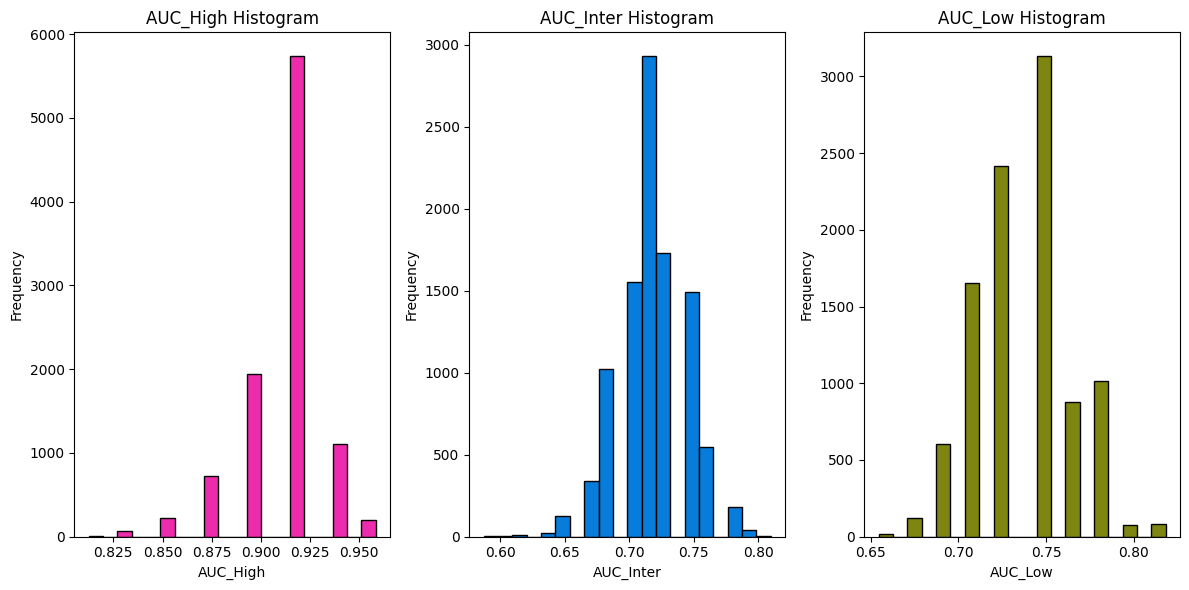

In [20]:
import matplotlib.pyplot as plt
# Define custom colors and edge colors
color_high = '#EC2CAC'  # Custom color for AUC_High
color_inter = '#077CDB'  # Custom color for AUC_Inter
color_low = '#7E8511'  # Custom color for AUC_Low
edge_color = 'black'  # Edge color

# Create a figure for the histograms
plt.figure(figsize=(12, 6))

# Histogram for 'AUC_High'
plt.subplot(131)
plt.hist(auc_high, bins=20, color=color_high, edgecolor=edge_color)
plt.title('AUC_High Histogram')
plt.xlabel('AUC_High')
plt.ylabel('Frequency')

# Histogram for 'AUC_Inter'
plt.subplot(132)
plt.hist(auc_inter, bins=20, color=color_inter, edgecolor=edge_color)
plt.title('AUC_Inter Histogram')
plt.xlabel('AUC_Inter')
plt.ylabel('Frequency')

# Histogram for 'AUC_Low'
plt.subplot(133)
plt.hist(auc_low, bins=20, color=color_low, edgecolor=edge_color)
plt.title('AUC_Low Histogram')
plt.xlabel('AUC_Low')
plt.ylabel('Frequency')

plt.tight_layout()  # Ensure the subplots don't overlap

# Define the file path where you want to save the histograms
output_file_path = model_dir + 'AUC.png'

# Save the figure to the specified file
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')

# Show the plots (optional)
plt.show()

In [21]:
import pandas as pd
import numpy as np

# Assuming df_result is your DataFrame
columns_of_interest = ['Acc', 'Acc_High', 'Acc_Inter', 'Acc_Low', 'AUC_High', 'AUC_Inter', 'AUC_Low', 'F1_S', 'F1_S_High', 'F1_S_Inter', 'F1_S_Low', 'LR_p_High', 'LR_p_Inter', 'LR_p_Low', 'LR_n_High', 'LR_n_Inter', 'LR_n_Low']

# Calculate the median and confidence interval
medians = df_result[columns_of_interest].median()
lower_bound = df_result[columns_of_interest].quantile(0.025)
upper_bound = df_result[columns_of_interest].quantile(0.975)

# Combine median, lower, and upper into a single string with two decimal places
result_strings = medians.round(2).astype(str) + ' (' + lower_bound.round(2).astype(str) + ', ' + upper_bound.round(2).astype(str) + ')'

# Create a new DataFrame with the desired format
table = pd.DataFrame({'Median (Lower_CI, Upper_CI)': result_strings})

# Add a new column for the metric names
table['auc_detail'] = columns_of_interest

# Reorder the columns
table = table[['auc_detail', 'Median (Lower_CI, Upper_CI)']]
# Save the table to Excel
table.to_excel(model_dir + 'Final_result_RF_01.xlsx', index=False)

# Display the table
table


invalid value encountered in subtract


,auc_detail,"Median (Lower_CI, Upper_CI)"
Acc,Acc,"0.71 (0.62, 0.75)"
Acc_High,Acc_High,"0.75 (0.62, 0.81)"
Acc_Inter,Acc_Inter,"0.62 (0.5, 0.69)"
Acc_Low,Acc_Low,"0.75 (0.62, 0.81)"
AUC_High,AUC_High,"0.92 (0.85, 0.94)"
AUC_Inter,AUC_Inter,"0.71 (0.67, 0.76)"
AUC_Low,AUC_Low,"0.75 (0.69, 0.78)"
F1_S,F1_S,"0.53 (0.48, 0.61)"
F1_S_High,F1_S_High,"0.67 (0.57, 0.73)"
F1_S_Inter,F1_S_Inter,"0.25 (0.22, 0.44)"
